In [1]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggstream)
library(geomtextpath)
library(ggrepel)

library(bbplot)
source('/home//jupyter/BRI_Figures_Final_V2/helper_function/helper_function_IHA.r')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_annotation$label<-gsub(" cell",'',color_annotation$label)
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [8]:
df<-read.csv("04_Composite_Score/SF4_CompositeScore_Down.csv")

In [9]:
df$celltype<-gsub(" cell",'',df$celltype)

In [10]:
df <- df %>% group_by(celltype)%>%
  arrange(desc(Ages))%>%
  mutate(label = ifelse(row_number() == 1 & 
                        Ages == max(Ages), 
                        as.character(celltype), 
                        NA_character_))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


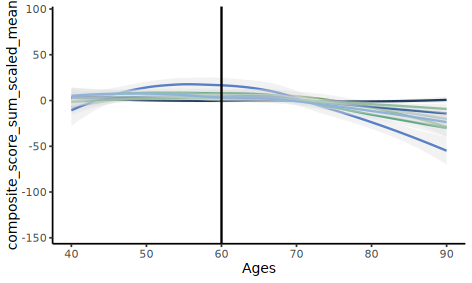

In [11]:
options(repr.plot.width = 100/25.4, repr.plot.height = 60/25.4)

p <- ggplot(data = df, aes(x = Ages, y = composite_score_sum_scaled_mean, color = celltype, group = celltype)) +
  geom_smooth(se = TRUE, fill = "#E0E0E0", linewidth = 0.5) +
  theme_classic(base_size = 6) +
  scale_color_manual(values = color_vector) +
coord_cartesian(xlim = c(40, 90),  clip = "off") + 
  geom_text_repel(aes(label = label),
                  size = 2.2,
                  nudge_x = 5,
                  segment.linetype = 2,
                  direction = "y",
                  segment.color = 'grey',
                  na.rm = TRUE) +
  theme_classic(base_size = 8) +
  theme(legend.position = "none")+
 geom_vline(xintercept = 60)


p

ggsave('FigureE.pdf',p,width = 85/25.4,height = 60/25.4)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


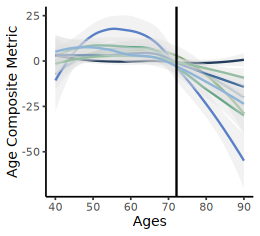

In [15]:
options(repr.plot.width = 55/25.4, repr.plot.height = 50/25.4)

p <- ggplot(data = df, aes(x = Ages, y = composite_score_sum_scaled_mean, color = celltype, group = celltype)) +
  geom_smooth(se = TRUE, fill = "#E0E0E0", linewidth = 0.5) +
  theme_classic(base_size = 6) +
  scale_color_manual(values = color_vector)  +
  theme_classic(base_size = 8) +
  theme(legend.position = "none")+
 geom_vline(xintercept = 72)+ylab("Age Composite Metric") 


p

ggsave('FigureF.pdf',p,width = 55/25.4,height = 50/25.4)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


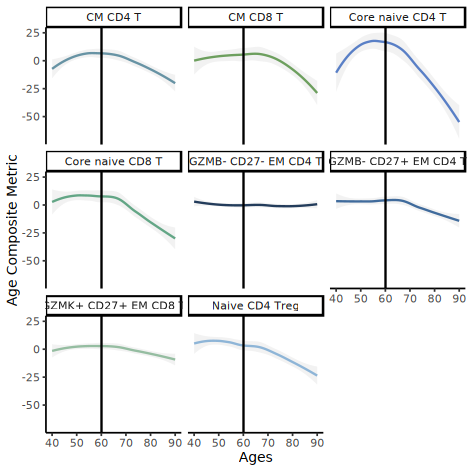

In [16]:
options(repr.plot.width = 100/25.4, repr.plot.height = 100/25.4)

p <- ggplot(data = df, aes(x = Ages, y = composite_score_sum_scaled_mean, color = celltype, group = celltype)) +
  geom_smooth(se = TRUE, fill = "#E0E0E0", linewidth = 0.5) +
  theme_classic(base_size = 6) +
  scale_color_manual(values = color_vector)  +
  theme_classic(base_size = 8) +
  theme(legend.position = "none")+
 geom_vline(xintercept = 60)+ylab("Age Composite Metric") +facet_wrap(~celltype)


p

ggsave('FigureE.pdf',p,width = 55/25.4,height = 50/25.4)

In [76]:
p<- ggplot(data = df, aes(x = Ages, y = composite_score_sum_scaled_mean, color = celltype,group = celltype)) +
  theme_classic(base_size = 8) +
  geom_smooth(se = TRUE, fill = "#E0E0E0", linewidth = 0.5) +
  scale_color_manual(values = color_vector) + 
  coord_cartesian(clip = "off") +
  geom_label_repel(aes( label=label),
                   fill = "white",
                   segment.linetype = 2,
                  direction = "y",
                   force = 1,
                   hjust = "left",
                   max.overlaps = Inf,
                  size = 2.2, xlim = c(0, Inf), ylim = c(-Inf, Inf))+  theme(legend.position = "none") 
  theme(plot.margin = unit(c(0.1, 5, 0.1,0.1), "cm") )+ylab("Age Composite Metric") 
ggsave('FigureE.pdf',p,width = 85/25.4,height = 60/25.4)

List of 2
 $ plot.margin: 'simpleUnit' num [1:4] 0.1cm 5cm 0.1cm 0.1cm
  ..- attr(*, "unit")= int 1
 $ y          : chr "Age Composite Metric"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1861 rows containing missing values or values outside the scale range
(`geom_label_repel()`).”
